In [306]:
import pandas as pd

orders = pd.read_csv(r'C:\Users\User\Desktop\Restaurants_orders.zip')
orders.shape

(2387224, 10)

In [307]:
orders.head(10)

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9
5,O1026484,2018-06-02 14:32:53,R10008,DELIVERY,1.0,0.0,NaN,NaN,NaN,NaN
6,O1878199,2018-10-19 19:55:09,R10008,PICKUP,0.0,0.0,I3,I6,I10,I12
7,O720465,2018-04-17 12:06:05,R10003,PICKUP,0.0,0.0,I0,I6,I10,I11
8,O1514673,2018-08-24 17:27:07,R10002,DELIVERY,0.0,0.0,I3,I7,I15,I10
9,O80138,2018-01-13 19:57:46,R10006,DELIVERY,0.0,0.0,I4,I7,I9,I11


In [308]:
Restaurant_id = orders.RESTAURANT_ID.unique().tolist()
print(f'Number of restaurants = {len(Restaurant_id)}')
print(sorted(Restaurant_id))

Number of restaurants = 8
['R10001', 'R10002', 'R10003', 'R10004', 'R10005', 'R10006', 'R10007', 'R10008']


# Task 1

In [309]:
import random
import numpy as np

In [310]:
def new_dataset(df, student_number):
    last_3_number = ''
    for single_number in [str(student_number)[a] for a in range(len(str(student_number))) if a > 4]:
        last_3_number += single_number
    
    last_3_number = int(last_3_number)
    print(last_3_number)
    # Identify the last 3 number from student number
    
    np.random.seed(student_number)
    new_list = np.random.choice(last_3_number, last_3_number, replace = False)
    print(len(new_list))
    # np.random.choice to set the data
    
    my_dataset = df.drop(index = new_list, inplace = False)
    print('My New Data Count = {}'.format(len(my_dataset)))
    # df.drop function to randomly delete data
    
    return my_dataset

In [314]:
my_dataset = new_dataset(orders, 32335679)
print(type(my_dataset['DATETIME'][680]))
# Run 2 times here to change the type of the data to pandas timestamp in order to proceed!!!
# Run 2 times here to change the type of the data to pandas timestamp in order to proceed!!!
# Run 2 times here to change the type of the data to pandas timestamp in order to proceed!!!

679
679
My New Data Count = 2386545
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [316]:
orders.DATETIME = (pd.to_datetime(orders.DATETIME))
print(min(orders['DATETIME']))
print(max(orders['DATETIME']))
print(type(orders['DATETIME'][679]))

2018-01-01 10:03:29
2018-12-31 22:57:15
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Task 2

In [317]:
import time
import datetime

# Test if the data is in pandas timestamp form
# Need to go back to my_dataset = new_dataset(orders, 32335679) to run again, in order to proceed
# Need to go back to my_dataset = new_dataset(orders, 32335679) to run again, in order to proceed
# Need to go back to my_dataset = new_dataset(orders, 32335679) to run again, in order to proceed

type(my_dataset['DATETIME'][680])

pandas._libs.tslibs.timestamps.Timestamp

In [322]:
my_dataset['WEEKOFYEAR'] = [b.week for b in my_dataset['DATETIME']]
weekly_orders = my_dataset.groupby(my_dataset['WEEKOFYEAR'])['ORDER_ID'].count()

In [323]:
r10008_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10008']
r10008_weekly_orders = r10008_figures.groupby(r10008_figures['WEEKOFYEAR'])['ORDER_ID'].count()

In [324]:
import matplotlib.pyplot as plt

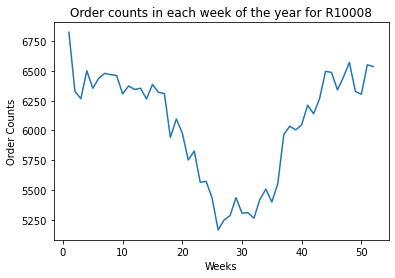

In [326]:
plt.figure()
r10008_weekly_orders.plot(kind = 'line', title = 'Order counts in each week of the year for R10008')
plt.xlabel('Weeks')
plt.ylabel('Order Counts')
plt.show()

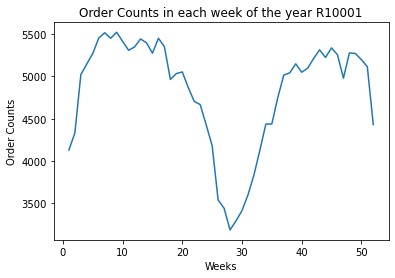

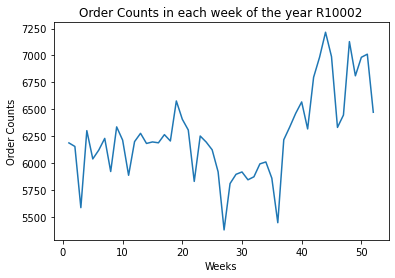

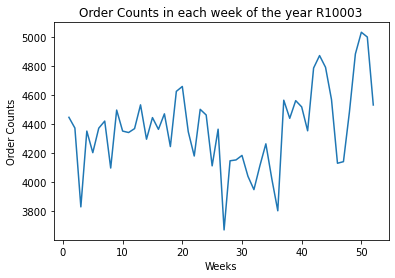

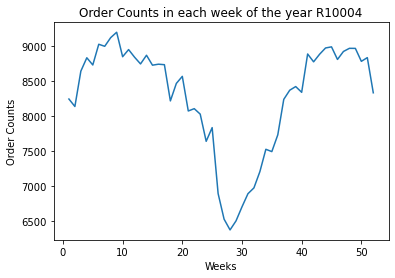

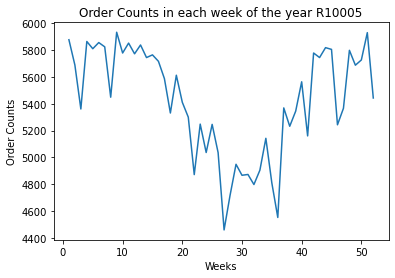

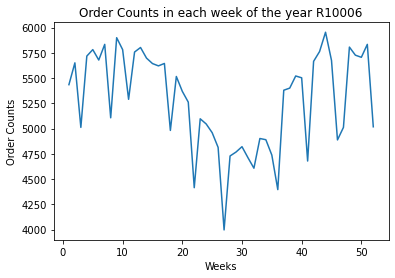

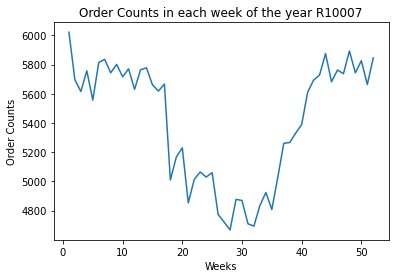

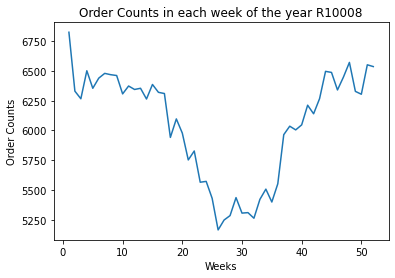

In [327]:
for c in range(1, 9):
    start = 0
    resto_data = my_dataset[my_dataset['RESTAURANT_ID'] == 'R1000{}'.format(c)]
    resto_weekly_orders = resto_data.groupby(resto_data['WEEKOFYEAR'])["ORDER_ID"].count()
    # Range function to show all 8 graphs in one go

    plt.figure()
    resto_weekly_orders.plot(kind = 'line', title = 'Order Counts in each week of the year R1000{}'.format(c))
    plt.xlabel('Weeks')
    plt.ylabel('Order Counts')
    plt.show()
    
    # For the sales trend of the 8 restaurant branches, we can see that the peak period are mostly in winter
    # Particularly in the late autumn to winter months, which has the highest sales
    # Although some restaurants may face a drastic drop between December and January
    # While the restaurants generally has the least sales in the summer months

# Task 3.1

In [246]:
r10008_typesum = r10008_figures['TYPE'].count()

In [261]:
r10008_service = r10008_figures.groupby('TYPE')

r10008_delivery = r10008_service['ORDER_ID'].get_group('DELIVERY').count()
print('Branch R10008 Delivery Orders:', r10008_delivery)
print('Branch R10008 Delivery Percentage of Orders: {:.2%}'.format((r10008_delivery/r10008_typesum)))

r10008_instore = r10008_service['ORDER_ID'].get_group('IN_STORE').count()
print('Branch R10008 In-store Orders:', r10008_instore)
print('Branch R10008 In-store Percentage of Orders: {:.2%}'.format((r10008_instore/r10008_typesum)))

r10008_pickup = r10008_service['ORDER_ID'].get_group('PICKUP').count()
print('Branch R10008 Pickup Orders:', r10008_pickup)
print('Branch R10008 Pickup Percentage of Orders: {:.2%}'.format((r10008_pickup/r10008_typesum)))

Branch R10008 Delivery Orders: 31810
Branch R10008 Delivery Percentage of Orders: 10.11%
Branch R10008 In-store Orders: 229366
Branch R10008 In-store Percentage of Orders: 72.91%
Branch R10008 Pickup Orders: 53408
Branch R10008 Pickup Percentage of Orders: 16.98%


In [262]:
# Firstly, define the figures of the respective restaurant branch
r10001_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10001']
r10002_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10002']
r10003_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10003']
r10004_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10004']
r10005_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10005']
r10006_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10006']
r10007_figures = my_dataset[my_dataset['RESTAURANT_ID'] == 'R10007']

In [263]:
# Typesum function to get the type count for each restaurant
r10001_typesum = r10001_figures['TYPE'].count()
r10002_typesum = r10002_figures['TYPE'].count()
r10003_typesum = r10003_figures['TYPE'].count()
r10004_typesum = r10004_figures['TYPE'].count()
r10005_typesum = r10005_figures['TYPE'].count()
r10006_typesum = r10006_figures['TYPE'].count()
r10007_typesum = r10007_figures['TYPE'].count()

In [274]:
r10001_service = r10001_figures.groupby('TYPE')
r10002_service = r10002_figures.groupby('TYPE')
r10003_service = r10003_figures.groupby('TYPE')
r10004_service = r10004_figures.groupby('TYPE')
r10005_service = r10005_figures.groupby('TYPE')
r10006_service = r10006_figures.groupby('TYPE')
r10007_service = r10007_figures.groupby('TYPE')

r10001_delivery = r10001_service['ORDER_ID'].get_group('DELIVERY').count()
r10002_delivery = r10002_service['ORDER_ID'].get_group('DELIVERY').count()
r10003_delivery = r10003_service['ORDER_ID'].get_group('DELIVERY').count()
r10004_delivery = r10004_service['ORDER_ID'].get_group('DELIVERY').count()
r10005_delivery = r10005_service['ORDER_ID'].get_group('DELIVERY').count()
r10006_delivery = r10006_service['ORDER_ID'].get_group('DELIVERY').count()
r10007_delivery = r10007_service['ORDER_ID'].get_group('DELIVERY').count()

r10001_instore = r10001_service['ORDER_ID'].get_group('IN_STORE').count()
r10002_instore = r10002_service['ORDER_ID'].get_group('IN_STORE').count()
r10003_instore = r10003_service['ORDER_ID'].get_group('IN_STORE').count()
r10004_instore = r10004_service['ORDER_ID'].get_group('IN_STORE').count()
r10005_instore = r10005_service['ORDER_ID'].get_group('IN_STORE').count()
r10006_instore = r10006_service['ORDER_ID'].get_group('IN_STORE').count()
r10007_instore = r10007_service['ORDER_ID'].get_group('IN_STORE').count()

r10001_pickup = r10001_service['ORDER_ID'].get_group('PICKUP').count()
r10002_pickup = r10002_service['ORDER_ID'].get_group('PICKUP').count()
r10003_pickup = r10003_service['ORDER_ID'].get_group('PICKUP').count()
r10004_pickup = r10004_service['ORDER_ID'].get_group('PICKUP').count()
r10005_pickup = r10005_service['ORDER_ID'].get_group('PICKUP').count()
r10006_pickup = r10006_service['ORDER_ID'].get_group('PICKUP').count()
r10007_pickup = r10007_service['ORDER_ID'].get_group('PICKUP').count()

In [299]:
type_summary_delivery = pd.DataFrame(index = sorted(Restaurant_id), columns = ['Type', 'Number of Orders', 'Percentage of Orders'])
type_summary_delivery['Type'] = 'DELIVERY'
type_summary_delivery['Number of Orders'] = [r10001_delivery, r10002_delivery, r10003_delivery, r10004_delivery, r10005_delivery, r10006_delivery, r10007_delivery, r10008_delivery]
type_summary_delivery['Percentage of Orders'] = type_summary_delivery['Number of Orders']/type_summary_delivery['Number of Orders'].sum()
type_summary_delivery['Percentage of Orders'] = type_summary_delivery['Percentage of Orders'].apply(lambda a: format(a, '.2%'))
print(type_summary_delivery)

            Type  Number of Orders Percentage of Orders
R10001  DELIVERY             25239                9.26%
R10002  DELIVERY             22369                8.21%
R10003  DELIVERY             15608                5.73%
R10004  DELIVERY             43303               15.89%
R10005  DELIVERY             28853               10.59%
R10006  DELIVERY             52061               19.10%
R10007  DELIVERY             53321               19.56%
R10008  DELIVERY             31810               11.67%


In [300]:
type_summary_instore = pd.DataFrame(index = sorted(Restaurant_id), columns = ['Type', 'Number of Orders', 'Percentage of Orders'])
type_summary_instore['Type'] = 'IN_STORE'
type_summary_instore['Number of Orders'] = [r10001_instore, r10002_instore, r10003_instore, r10004_instore, r10005_instore, r10006_instore, r10007_instore, r10008_instore]
type_summary_instore['Percentage of Orders'] = type_summary_instore['Number of Orders']/type_summary_instore['Number of Orders'].sum()
type_summary_instore['Percentage of Orders'] = type_summary_instore['Percentage of Orders'].apply(lambda b: format(b, '.2%'))
print(type_summary_instore)

            Type  Number of Orders Percentage of Orders
R10001  IN_STORE            182545               10.66%
R10002  IN_STORE            244921               14.30%
R10003  IN_STORE            171439               10.01%
R10004  IN_STORE            314755               18.38%
R10005  IN_STORE            204545               11.94%
R10006  IN_STORE            180562               10.54%
R10007  IN_STORE            184547               10.78%
R10008  IN_STORE            229366               13.39%


In [301]:
type_summary_pickup = pd.DataFrame(index = sorted(Restaurant_id), columns = ['Type', 'Number of Orders', 'Percentage of Orders'])
type_summary_pickup['Type'] = 'PICKUP'
type_summary_pickup['Number of Orders'] = [r10001_pickup, r10002_pickup, r10003_pickup, r10004_pickup, r10005_pickup, r10006_pickup, r10007_pickup, r10008_pickup]
type_summary_pickup['Percentage of Orders'] = type_summary_pickup['Number of Orders']/type_summary_pickup['Number of Orders'].sum()
type_summary_pickup['Percentage of Orders'] = type_summary_pickup['Percentage of Orders'].apply(lambda b: format(b, '.2%'))
print(type_summary_pickup)

          Type  Number of Orders Percentage of Orders
R10001  PICKUP             42945               10.70%
R10002  PICKUP             57886               14.42%
R10003  PICKUP             40329               10.05%
R10004  PICKUP             72694               18.11%
R10005  PICKUP             48500               12.09%
R10006  PICKUP             42292               10.54%
R10007  PICKUP             43247               10.78%
R10008  PICKUP             53408               13.31%


# Task 3.2

In [328]:
def total_revenue_drinks_cookies(dataset, restaurant_id):
    drinks_price = 3.80
    cookies_price = 1.20
    
    drinks_amount = sum(dataset[dataset['RESTAURANT_ID'] == restaurant_id]['DRINKS'])
    cookies_amount = sum(dataset[dataset['RESTAURANT_ID'] == restaurant_id]['COOKIES'])
    
    output = drinks_amount * drinks_price + cookies_amount * cookies_price
    
    return output

In [329]:
print('The total revenue made from Drinks and Cookies sales is £{}'.format(total_revenue(my_dataset, 'R10008')))

The total revenue made from Drinks and Cookies sales is £212957.0


# Task 4

In [211]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [212]:
student_number = 32335679
last_number = 9
# 9 --> Restaurant R10008

In [213]:
r10008_nan_filtered = my_dataset[my_dataset['RESTAURANT_ID'] == 'R1000{}'.format(int(str(student_number)[7]) - 1)]
r10008_nan_filtered.count()

ORDER_ID         314584
DATETIME         314584
RESTAURANT_ID    314584
TYPE             314584
DRINKS           314584
COOKIES          314584
MAIN             299737
BASE             299737
SIDE_1           299737
SIDE_2           299737
WEEKOFYEAR       314584
dtype: int64

In [214]:
n_drinks = r10008_data[r10008_data['DRINKS'] > 0].count()['DRINKS']
n_cookies = r10008_data[r10008_data['COOKIES'] > 0].count()['COOKIES']
n_main = r10008_data.count()['MAIN']
n_base = r10008_data.count()['BASE']
n_side1 = r10008_data.count()['SIDE_1']
n_side2 = r10008_data.count()['SIDE_2']
# Count the total amount for each of the products

In [295]:
from pulp import *

optimal_order = LpProblem('Optimal Menu Problem', LpMaximize)

p_drinks = LpVariable(name = 'p_drinks', lowBound = 2, upBound = 4)
p_cookies = LpVariable(name = 'p_cookies', lowBound = 0.5, upBound = 1.5)
p_main = LpVariable(name = 'p_main', lowBound = 8, upBound = 25)
p_base = LpVariable(name = 'p_base', lowBound = 1, upBound = 3)
p_side1 = LpVariable(name = 'p_side1', lowBound = 1, upBound = 2.5)
p_side2 = LpVariable(name = 'p_side2', lowBound = 1.5, upBound = 3)

optimal_order += (p_drinks + p_cookies + p_main + p_base + p_side1 + p_side2 <= 30)
optimal_order += p_drinks >= 2 and p_drinks <= 4
optimal_order += p_cookies >= 0.5 and p_cookies <= 1.5
optimal_order += p_main >= 8 and p_main <= 25
optimal_order += p_base >= 1 and p_base <= 3
optimal_order += p_side1 >= 1 and p_side1 <= 2.5
optimal_order += p_side2 >= 1.5 and p_side2 <= 3

optimal_order += n_drinks * p_drinks + n_cookies * p_cookies + n_main * p_main + n_base * p_base + n_side1 * p_side1 + n_side2 * p_side2

opt = optimal_order.solve()
for var in optimal_order.variables():
    print(f'{var.name}: {var.value()}')
    
print(f'Optimal Objective Value: {optimal_order.objective.value()}')

# For the optimal order, drinks should = £2.0, cookies = £0.5, main = £24.0, base = £1.0, side 1 = £1.0 and side 2 = £1.5

p_base: 1.0
p_cookies: 0.5
p_drinks: 2.0
p_main: 24.0
p_side1: 1.0
p_side2: 1.5
Optimal Objective Value: 8323560.0


C:\Users\User\anaconda3\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
